<a href="https://colab.research.google.com/github/andreRibeiro1989/medium/blob/main/tensorflow_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

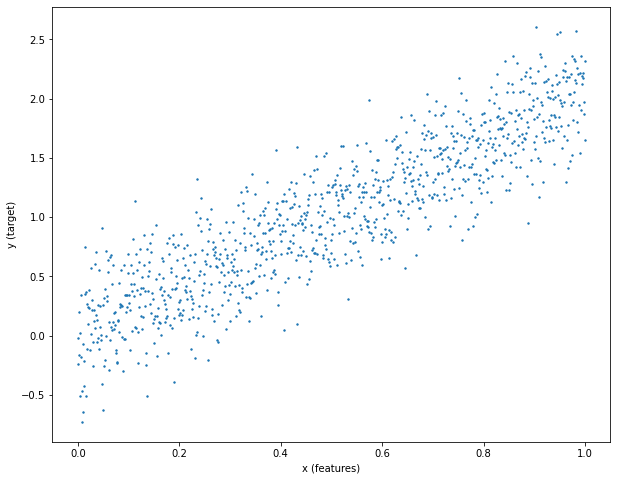

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# create a noisy linear correlation

x = np.linspace(0, 1, 1000)
y = 2 * x + np.random.randn(1000) * 0.3

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=2)
plt.xlabel('x (features)')
plt.ylabel('y (target)')
plt.show()

In [2]:
import tensorflow as tf

# defines the data type of the variable used for w
dtype = tf.float32

# States that the weight is a tensorflow variable. 
# This will allow us to calculate the gradient associated with this variable
# and optimize it using the high level tensorflow modules.
w_tensor = tf.Variable(0.1, dtype=dtype)

w_tensor

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.1>

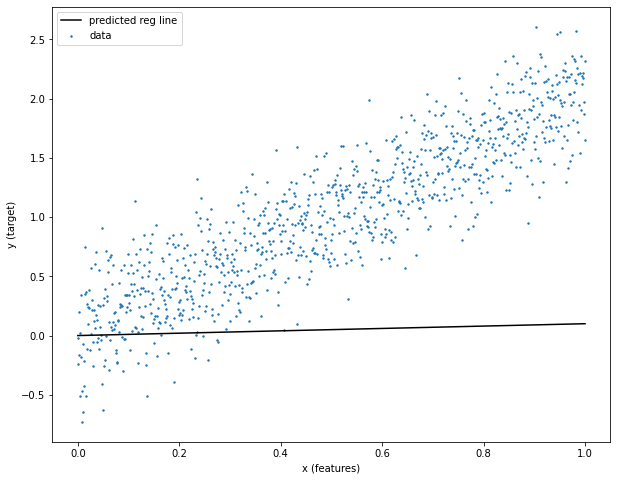

In [3]:
# defines the figure to plot
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlabel('x (features)')
plt.ylabel('y (target)')

# plot the original data
line1 = ax.scatter(x, y, s=2)

# estimates the predicted Y and plots a new line
reg_x = np.linspace(0,1,100)
reg_yhat = np.linspace(0,1,100) * w_tensor.numpy()
line2, = ax.plot(reg_x, reg_yhat, 'black')

# display legend
plt.gca().legend(['predicted reg line', 'data'])

In [4]:
# defines a stochastic gradient descent optimizer
learning_rate = 1e-4
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# defines a mean squared error loss metric
loss_func = tf.keras.losses.MSE

# initialises a variable to keep track of the loss changes during optimization
loss_history = []

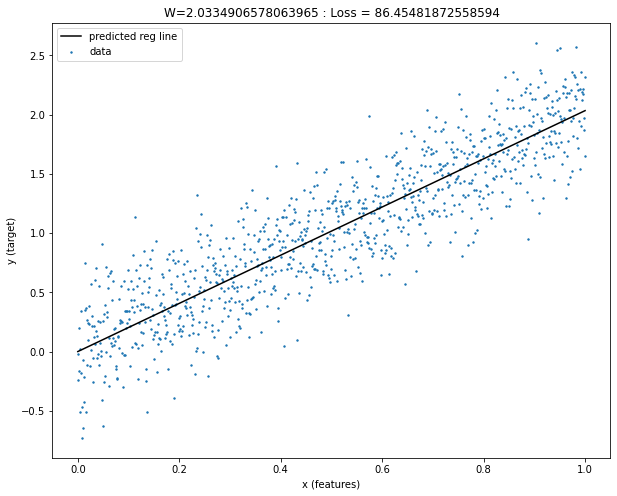

In [5]:
# optimization loop
for e in range(100):

  # predicts y given the input x vector and the estimated weight
  loss = lambda: loss_func(y, x * w_tensor) * 1000

  # plots the current fit
  if e % 1 == 0: 
    line2.set_ydata(np.linspace(0,1,100) * w_tensor.numpy())
    ax.set_title(f'W={w_tensor.numpy()} : Loss = {loss().numpy()}')

    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)
  
  # In eager mode, simply call minimize to update the list of variables.
  optimizer.minimize(loss, var_list=[w_tensor])

## NN Module

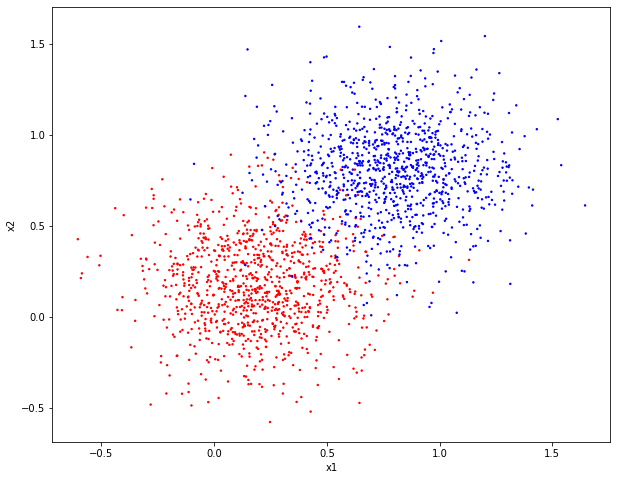

In [6]:
# create a two class classification problem

r = 0.25

# defines the first cluster x and y points
x1_1 = r*np.random.randn(1000)+0.2
x1_2 = r*np.random.randn(1000)+0.2

# defines the second cluster x and y points
x2_1 = r*np.random.randn(1000)+0.8
x2_2 = r*np.random.randn(1000)+0.8

# concatenates the two clusters to create our input features
x = np.vstack([np.append(x1_1, x2_1), np.append(x1_2, x2_2)]).T.astype('float32')

# defines the first cluster as class 0 and the second as class 1
y = np.hstack([np.zeros(1000,),np.ones(1000,)]).astype('int')
              
# plots the two clusters
cmap = np.array(['r', 'b'])
plt.figure(figsize=(10, 8))
plt.scatter(x[:,0], x[:,1], s=2, c=cmap[(y > 0.5).astype(int)])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [7]:
# RMSprop is an adaptive gradient descent approach that showed
# consistent speed improvements over vanilla SGD
optimizer = tf.keras.optimizers.RMSprop()

# SparseCategoricalCrossentropy should be used for classification
# problems where the target variable is encoded as an integer.
# If the target is one-hot-encoded use the CategoricalCrossentropy
# function instead.
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()

In [8]:
# model definition through Keras. 
# This statement defines a neural network with 5 layers.
# For the first layer you need to define the shape of your input features,
# while for the last layer (or second to last if the last is an activation layer)
# you need to match the layer size with the number of classes in your target variable.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(2,)), # there are 2 features in the x variable
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(2), # there are 2 classes in our dataset
    tf.keras.layers.Softmax(),
])

# links the model with the loss and optimizer
# This statement allows tensorflow to create the static computational graph
# and optimize the network given the loss function.
model.compile(optimizer=optimizer, loss=loss_func)

# provides a summary of our custom network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
re_lu (ReLU)                 (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
_________________________________________________________________
softmax (Softmax)            (None, 2)                 0         
Total params: 92
Trainable params: 72
Non-trainable params: 20
_________________________________________________________________


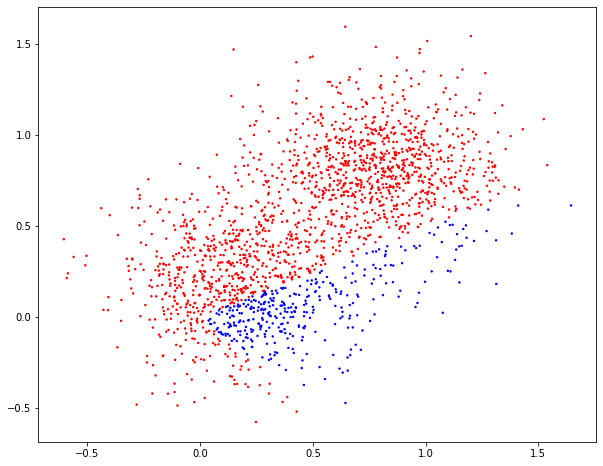

In [9]:
# Calculates the probability of belonging to each class
yhat = model.predict(x)

# sets the color of each sample to red or blue 
# depending on the most probable class for that sample
cmap = np.array(['r', 'b'])
c = cmap[(yhat.argmax(axis=1).flatten() > 0.5).astype(int)]

# plot the original data with the predicted colors
fig, ax = plt.subplots(figsize=(10, 8))
line1 = ax.scatter(x[:,0], x[:,1], s=2, c=c)

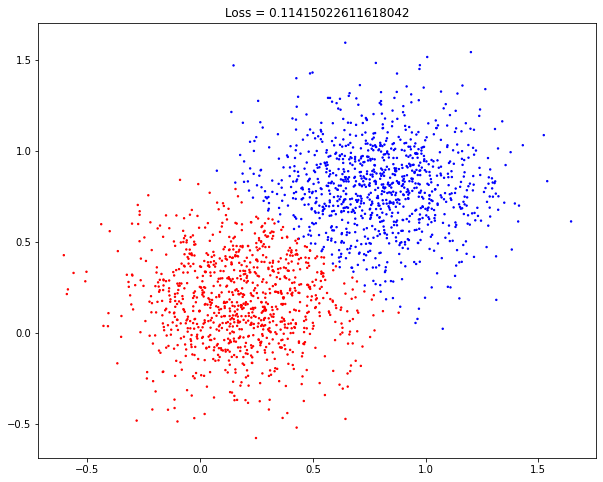

In [10]:
# The following statement is equivalent to the loop below.
# We took the loop approach to show how the weights change
# through different checkpoints.
# model.fit(x, y, epochs=50, verbose=0)

for e in [1]*5+[5, 40]:

  # updates and plots the current fit
  yhat = model.predict(x)
  loss = model.loss(y, yhat)
  c = cmap[(yhat.argmax(axis=1).flatten() > 0.5).astype(int)]
  
  line1.set_color(c)
  ax.set_title(f'Loss = {loss}')
  display.clear_output(wait=True)
  display.display(fig)
  time.sleep(0.1)
  
  # fit model
  model.fit(x, y, epochs=e, verbose=0)